# Day 2

## Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.
# To find a local minimum of a function using gradient descent,
# we take steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

In [5]:
# for uni-variate Linear Regreession (We have only one variable + baise term)

### $ {temp_0} = {\theta}_0 - \alpha * \frac{1}{m} \sum \limits_{i=1} ^{m} J {(h_{(\theta_i)} - y)}  $
### $ {temp_1} = {\theta}_1 - \alpha * \frac{1}{m} \sum \limits_{i=1} ^{m} J {(h_{(\theta_i)} - y)} * x_i  $
### $ \theta_0 = temp_0 $
### $ \theta_1 = temp_1 $

##### So What is  $ {\alpha} $ = ??
###### It's a value of step size When we take gradient of Cost Fucntion, it's define how much step size we take towards Global minimum
###### Note: Large Step Size might be Diverge you from a Global minimum

In [10]:
# Implmentation of Gradient Descent

def Gradient_descent(X, Y, theta, alpha=0.3, itr=50):
    i = 0
    J_array = []
    theta_values = []
    m = X.shape[0]
    while i < itr:
        
        # This is not Part of Graient Descent 
        # This is jst for ploting Graph of our convergence
        theta_values.append(np.copy(theta[1]))
        
        # Calculate Hypothesis
        h_error = hypothesis(X,theta)
        
        # Changing Thetas Values
        temp0 = alpha * (1/m) * (h_error-Y).T.dot(X[:,0].reshape(-1,1))
        temp1 = alpha * (1/m) * (h_error-Y).T.dot(X[:,1].reshape(-1,1))
        theta[0] = theta[0] - temp0
        theta[1] = theta[1] - temp1
        
        # Collecting Value of Cost Function For
        # itreation Vs. Cost Graph
        J_array.append(Cost_function(h_error, Y))
        
        i+=1
        
    return J_array,theta,theta_values

In [97]:
# This is all from Day 1 Stuff

# Cost Function
def Cost_function(h, Y):
    m = Y.shape[0]
    error = h - Y
    sqrError = np.power(error,2)
    sumOfError = np.sum(sqrError)
    J = 1/(2*m) * sumOfError
    return J

# Hypothesis
def hypothesis(X, theta):
    h = X.dot(theta)
    return h

# Add Bais
def add_bais(X):
    Xnorm = np.insert(X, 0, 1, axis=1)
    return Xnorm

#generating data
def generate_data():
    X = np.array(range(10)).reshape(-1,1)
    Y = np.array(range(10)).reshape(-1,1)
    theta = np.random.random((X.shape[1]+1,1))
    return (X,Y,theta)

# Plot Graph
def plot_graph(X,Y,h,num):
    plt.figure(num)
    plt.plot(X,Y,'go')
    plt.plot(X,h,'b')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    
# Cost Vs. Iteration Graph
def CostVsItr(J_array,n):
    plt.figure(n)
    plt.plot(range(len(J_array)),J_array,'b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost function')
    plt.grid(True)

# theta_1 Vs. Cost Function Graph  
def theta_cost(X,Y,theta,theta_values,itr):
    theta_copy = np.copy(theta)
    theta_copy[0] = 0
    J = []
    J2 = []

    for i in np.linspace(np.min(theta_values),np.max(theta_values),itr):
        theta_copy[1] = i
        h_error = hypothesis(X,theta_copy)
        J.append(Cost_function(Y,h_error))

    for i in theta_values:
        theta_copy[1] = i
        h_error = hypothesis(X,theta_copy)
        J2.append(Cost_function(Y,h_error))

    # Cost Function Vs. Theta1 Graph
    theta_1 = np.linspace(np.min(theta_values),np.max(theta_values),itr).reshape(-1,1)
    plt.figure(4)
    plt.plot(theta_1,J,'b')
    plt.plot(theta_values,J2,'r')
    plt.xlabel('theta_1')
    plt.ylabel('Cost')
    plt.legend('CT')
    plt.title('theta_1 Vs. Cost function')
    plt.grid(True)


In [104]:
# Run All sort of Functions
def Run():
    X,Y,theta = generate_data()
    Xnorm = add_bais(X)
    
    # Before
    print("")
    h = hypothesis(Xnorm,theta)
    plot_graph(X,Y,h,1)
    
    itr = 50
    alpha = 0.06
    J_array,theta,theta_values = Gradient_descent(Xnorm, Y, theta, alpha, itr)
    
    # After
    h = hypothesis(Xnorm,theta)
    plot_graph(X,Y,h,2)
    
    # Cost Vs. Iteration
    CostVsItr(J_array,3)
    
    # theta_1 Vs. Cost Graph (step Size)
    theta_cost(Xnorm,Y,theta,theta_values,itr)

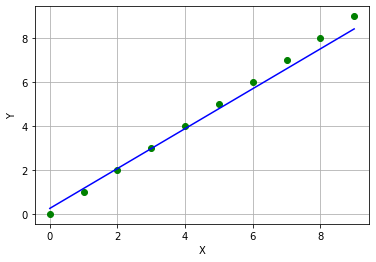

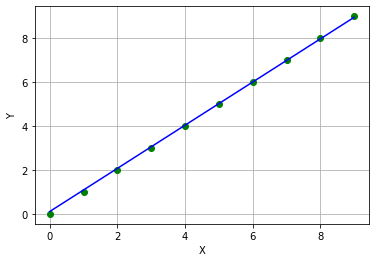

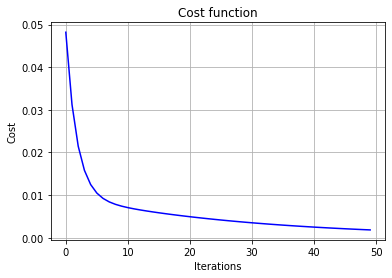

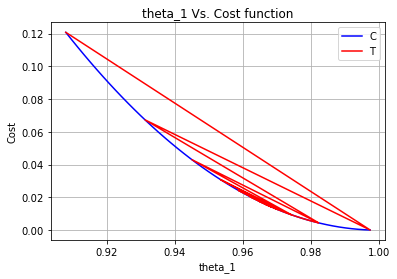

In [107]:
Run()